# Sheet properties

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Imports

In [2]:
import sys
sys.path.append('/home/rcendre/classification')
from joblib import dump, load
from numpy import array, logspace
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from toolbox.classification.common import Data, Folds, IO, Tools
from toolbox.classification.parameters import Dermatology, Settings
from toolbox.transforms.common import FlattenTransform
from toolbox.transforms.labels import OrderedEncoder
from toolbox.views.common import Views, ViewsTools
from toolbox.models.models import DecisionVotingClassifier, ScoreVotingClassifier
from toolbox.transforms.images import SpatialImageTransform
from toolbox.views.images import PatchViews
import warnings
warnings.filterwarnings('ignore') 

Using TensorFlow backend.


# Parameters

In [3]:
# Advanced parameters
extraction = 'Frequency' 
validation = 4
settings = Settings.get_default_dermatology()
label_encoder = OrderedEncoder().fit(['Normal', 'Benign', 'Malignant'])

# Sliding window

In [4]:
inputs_options = []
inputs_options.append((250,0))
inputs_options.append((500,0))

# Low level predictions

In [6]:
low_predictor = load(f'{extraction}Predictor')
for size, overlap in inputs_options:
    inputs = IO.load(f'{extraction}_{size}_{overlap}.pickle')
        
    # Add scaling
    Tools.predict(inputs, {'datum': f'{extraction}'}, low_predictor, Tools.PREDICTION, mask=inputs.Type != 'Full')
    Tools.predict_proba(inputs, {'datum': f'{extraction}'}, low_predictor, Tools.PROBABILITY, mask=inputs.Type != 'Full')
    IO.save(inputs, f'All{extraction}_{size}_{overlap}.pickle')

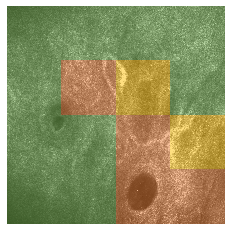

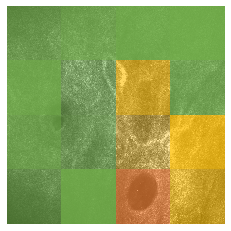

In [30]:
size = 250 
overlap = 0

index = 2600
inputs = IO.load(f'All{extraction}_{size}_{overlap}.pickle')

PatchViews.display(inputs,Tools.PREDICTION, settings, label_encoder, index=index)    
PatchViews.display(inputs,Tools.PROBABILITY, settings, label_encoder, index=index)

In [ ]:
np.array(inputs[Tools.PROBABILITY].to_list())

In [ ]:
index = 1
for size, overlap in inputs_options:
    inputs = IO.load(f'All{extraction}_{size}_{overlap}.pickle')
    
    PatchViews.display(inputs,Tools.PREDICTION, settings, label_encoder, index=index)    
    PatchViews.display(inputs,Tools.PROBABILITY, settings, label_encoder, index=index)